# Modelos de Regresion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

### importar metricas de sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## KNN

In [2]:
# Genera datos de ejemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(4000))[:, np.newaxis]  # Asegúrate de que X tenga la forma (n_samples, 1)
y = np.sin(X).ravel() + np.random.normal(size = 4000, scale = 0.1)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

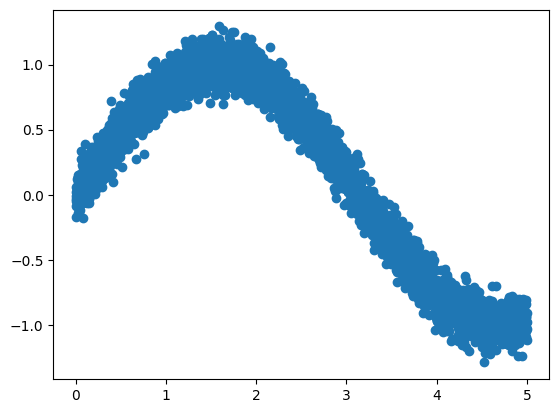

In [3]:
plt.figure('Datos simulados')
plt.scatter(X,y)

In [12]:
# Crea el regresor KNN
k = len(X_train) # Número de vecinos a considerar
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Entrena el modelo
knn_regressor.fit(X_train, y_train)

# Predice para nuevos puntos
y_pred_test = knn_regressor.predict(X_test)
X_new = np.linspace(0, 5, 1000)[:, np.newaxis]  # Asegúrate de que X_new tenga la forma (n_samples, 1)
y_pred = knn_regressor.predict(X_new)

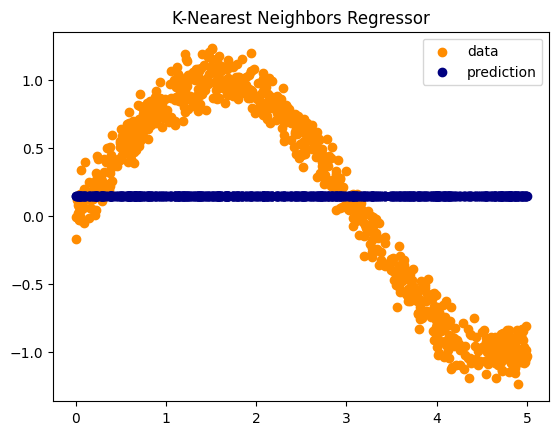

In [13]:
# Grafica los resultados
plt.figure('KNN Test')
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.scatter(X_test, y_pred_test, color='navy', label='prediction')
plt.legend()
plt.title('K-Nearest Neighbors Regressor')
plt.show()

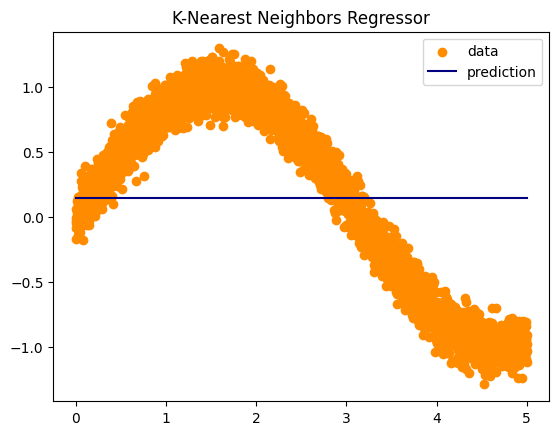

In [14]:
# Grafica los resultados
plt.figure('Ejemplo Knn Regressor')
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_new, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('K-Nearest Neighbors Regressor')
plt.show()

### California Housing Dataset

In [15]:
# Carga el dataset de California Housing
desc = fetch_california_housing()
X,Y = fetch_california_housing(return_X_y = True)
data = pd.DataFrame(X, columns =desc['feature_names'] )
data[desc['target_names'][0]] = Y 

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
### Dividir conjunto de datos
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

### Entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### KNN

In [17]:
### Modelo de KNN
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

### Entrenamiento
y_train_pred = knn_reg.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, R2: {r2_train}')

### Validación
y_val_pred = knn_reg.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Validación - MAE: {mae_val}, MSE: {mse_val}, R2: {r2_val}')

Entrenamiento - MAE: 0.6723569365310078, MSE: 0.7670076617948007, R2: 0.4218740782445074
Validación - MAE: 0.8395163415697674, MSE: 1.1739077816527528, R2: 0.10068580910786129


### Regresion Lineal

In [18]:
### Modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

### Entrenamiento
y_train_pred = lin_reg.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, R2: {r2_train}')

### Validación
y_val_pred = lin_reg.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Validación - MAE: {mae_val}, MSE: {mse_val}, R2: {r2_val}')

Entrenamiento - MAE: 0.5259662319942927, MSE: 0.5145924626720385, R2: 0.6121300260357871
Validación - MAE: 0.5336164161743371, MSE: 0.5325643962848099, R2: 0.5920099290350326


## Regularizacion

In [20]:
### Regularizacion Ridge y Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

### Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [21]:
### Modelo Ridge
### ajuste del hiperparámetro alpha con grid search

# Definir valores de alpha usando linspace
alpha_linear = np.linspace(0.001, 100, num=100)  # Genera 100 valores linealmente espaciados entre 0.001 y 100
param_grid = {'alpha': alpha_linear}
#print("Valores de alpha usando linspace:", alpha_linear)

# Inicializar el modelo de regresión ridge
ridge = Ridge()

# Realizar la búsqueda de parámetros óptimos con validación cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_alpha_ridge = grid_search.best_params_['alpha']
print(f'Mejor alpha para Ridge: {best_alpha_ridge}')

Mejor alpha para Ridge: 5.051454545454546


In [22]:
### Modelo Ridge con el mejor alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_scaled, y_train)
### Evaluación en el conjunto de entrenamiento y validación
y_train_pred = ridge_best.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Ridge Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, R2: {r2_train}')

y_val_pred = ridge_best.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Ridge Validación - MAE: {mae_val}, MSE: {mse_val}, R2: {r2_val}')

Ridge Entrenamiento - MAE: 0.5259413646528986, MSE: 0.5145967067763966, R2: 0.6121268270758988
Ridge Validación - MAE: 0.5335836491536063, MSE: 0.5325129860315719, R2: 0.59204931370478


In [23]:
### Modelo Lasso
### ajuste del hiperparámetro alpha con grid search
# Definir valores de alpha usando logspace
alpha_log = np.logspace(-4, 2, num=100)  # Genera 100 valores logarítmicamente espaciados entre 10^-4 y 10^2
param_grid = {'alpha': alpha_log}
#print("Valores de alpha usando logspace:", alpha_log)  
# Inicializar el modelo de regresión Lasso
lasso = Lasso(max_iter=10000)
# Realizar la búsqueda de parámetros óptimos con validación cruzada
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_alpha_lasso = grid_search.best_params_['alpha']
print(f'Mejor alpha para Lasso: {best_alpha_lasso}')

Mejor alpha para Lasso: 0.0008111308307896872


In [24]:
### mejor modelo Lasso con el mejor alpha
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)
### Evaluación en el conjunto de entrenamiento y validación
y_train_pred = lasso_best.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Lasso Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, R2: {r2_train}')

y_val_pred = lasso_best.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Lasso Validación - MAE: {mae_val}, MSE: {mse_val}, R2: {r2_val}')

Lasso Entrenamiento - MAE: 0.5260127346284729, MSE: 0.5146301866860389, R2: 0.6121015918604162
Lasso Validación - MAE: 0.5336244342588583, MSE: 0.5323834788833876, R2: 0.5921485273040119


In [25]:
### coeficientes de los modelos
print("Coeficientes Ridge:", ridge_best.coef_)
print("Coeficientes Lasso:", lasso_best.coef_)

Coeficientes Ridge: [ 0.8504724   0.11999492 -0.3126154   0.35986559 -0.00127634 -0.04245703
 -0.88943687 -0.86583665]
Coeficientes Lasso: [ 8.46608725e-01  1.20136634e-01 -3.02956192e-01  3.50468755e-01
 -4.25450212e-04 -4.16518984e-02 -8.85503802e-01 -8.61420131e-01]
